<a href="https://colab.research.google.com/github/aroonaram/Twitter_Sentiment_Doctor_Strange/blob/main/DoctorStrangeSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import csv
import re 
import string
import tweepy
import time
import ast
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def read_data():
    df=pd.DataFrame()
    df=pd.read_csv('/content/sample_data/DoctorStrangeData.csv')
    df.head()
    return df

In [ ]:
def pre_processing(df):
    df.columns=['Date','Tweet','Name','Likes','Retweet','Truncated','Location']
    df['Tweet']=df['Tweet'].apply(lambda x:ast.literal_eval(x).decode('utf-8'))
    df['Location']=df['Location'].apply(lambda x:ast.literal_eval(x).decode('utf-8'))
    df['Name']=df['Name'].apply(lambda x:ast.literal_eval(x).decode('utf-8'))
    df.drop(['Truncated'],inplace=True,axis=1)
    return df

In [ ]:
def assorted_tweets(df):
    location=['Atlanta, GA','Washington, DC','Los Angeles, CA',        'New York, NY', 'Chicago, IL', 'California, USA', 'Houston, TX',
'San Francisco, CA','New Jersey, USA','Boston, MA','Raleigh,                   NC','Nashville, TN','Seattle, WA','Pittsburgh, PA',
'Austin, TX','Dallas, TX','California','Portland, OR','Texas', 'Toronto','Phoenix, AZ','New York, USA','Toronto, Ontario', 'Texas, USA','Philadelphia, PA','Denver, CO','New York','Florida, USA','Manchester & San Francisco','Charlotte, NC','Las Vegas, NV','Cleveland, OH','Florida','Pennsylvania, USA','Maryland, USA','Louisville, KY','San Antonio, TX','Brooklyn, NY','Orlando, FL','Washington, D.C.','Miami, FL','Lagos, Nigeria','San Diego, CA',
'Detroit, MI','Colorado, USA','Michigan','Columbus, OH','Los Angeles','Sacramento, CA','New Jersey','Winchester, VA',
'Baltimore, MD','Pennsylvania','Providence, RI','Indianapolis, IN','North Carolina','Virginia, USA','Indiana','Colorado', 'Illinois, USA','St. Paul, MN','Buffalo, NY','North Carolina, USA','Calgary, Alberta']          
    df_new= df[df['Location'].isin(location)]
    df_new.reset_index(inplace=True)
    df_new.drop(['index'],inplace=True,axis=1)
    return df_new


In [ ]:
def view_data():
 pd.set_option("display.max_rows", None)
 pd.set_option("display.max_columns", None)
 pd.set_option("display.width", None)
 pd.set_option("display.max_colwidth", None)
 return

In [ ]:
def mention_data(df_new):
   mention=[]
   for i in df_new['Tweet']:
       txt=i
       x = re.findall("@", txt)
       mention.append(x)
   df_new['Mentions']=mention
   df_new['len']=df_new['Mentions'].map(lambda x: len(x))
        
   mentions['Total']=df_new['len'].groupby(df_new['Location']).sum()
   df_new.drop(['Mentions'],inplace=True,axis=1)
   return df_new, mentions

In [ ]:
def clean_tweets(df_new):
    stop = stopwords.words('english')
    df_new['Tweet'] = df_new['Tweet'].apply(lambda x: ' '.join([word      for word in x.split() if word not in (stop)]))
    df_new['Tweet']=df_new['Tweet'].apply(lambda x: str(x).split('http')[0])
    for i in range(len(df_new['Tweet'])):
        v = df_new['Tweet'][i]
        v = re.sub(r"@[A-Za-z0-9]+", "", v)
        df_new['Tweet'][i]=v
    return df_new

In [ ]:
def create_wordcloud(df_new):
    words=''.join(list(df_new['Tweet']))
    spam_wc=WordCloud(width=512,height=512).generate(words)
    plt.figure(figsize=(8,6),facecolor='k')
    plt.imshow(spam_wc)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    return

In [ ]:
def sentiment_analysis(df_new):
    sentiment=[]
    Type=[]
    polarity=0
    for i in df_new['Tweet']:
        sentiments=TextBlob(i)
        sentiment.append(sentiments)
        tweet_polarity=sentiments.polarity
        if tweet_polarity>0.00:
            Type.append('Positive')
        elif tweet_polarity<0.00:
            Type.append('Negative')
        elif tweet_polarity==0.00:
            Type.append('Neutral')
        polarity+=tweet_polarity
    df_new['Sentiment']=Type
    return df_new

In [ ]:
def recruiter_recruitee(df_new):
    df_recruitee = df_new[df_new['Tweet'].str.contains('need')|df_new['Tweet'].str.contains('want work')|
                      df_new['Tweet'].str.contains('help')|df_new['Tweet'].str.contains('new job')|
                      df_new['Tweet'].str.contains('looking')|df_new['Tweet'].str.contains('support')]
    df_recruitee.drop_duplicates(inplace=True)
    df_recruiter = df_new[df_new['Tweet'].str.contains('link bio')|df_new['Tweet'].str.contains('hiring')|
                      df_new['Tweet'].str.contains('looking')|df_new['Tweet'].str.contains('job opening')|
                      df_new['Tweet'].str.contains('recommend')]
    df_recruitee.drop_duplicates(inplace=True)
    return df_recruitee,df_recruiter

In [ ]:
from operator import contains
#re.search(r'\bis\b', your_string)

def removeTweet(df_new):
    print(df_new.head())
    df_removePromotional = pd.DataFrame()
    #print(type(df_new), df_new.head(5))
    for i in range(len(df_new)) :
      #print(df_new.loc[i, "Tweet"])
      tweet = df_new.loc[i, "Tweet"]
      if((tweet.startswith("b'RT @FandomWire:"))| (tweet.startswith("b'RT @MarvelStudios"))|(tweet.startswith("b'RT @DrStrange:"))|(tweet.startswith("b'RT @DrStrangeUpdate:"))): 
        #print(tweet)  
        continue 
      elif(("RETWEET and FOLLOW ") in tweet):
        continue
      else:
        #print(df_new.loc[i], type(df_new.loc[i]))
        #df_removePromotional = pd.concat(df_removePromotional, df_new.loc[i])
        df_removePromotional = df_removePromotional.append( df_new.loc[i],ignore_index=True)
        #df_removePromotional.append(df_new.loc[i])
        
    #print(df_removePromotional.head())
    return df_removePromotional


In [ ]:
if __name__ == '__main__':
    #extract_tweets()
    #view_data()
    df=read_data()
    df_removed = removeTweet(df)
    df=pre_processing(df_removed)
    #df_new=assorted_tweets(df)
    mentions=pd.DataFrame()
    df_new,mentions=mention_data(df)
    df_new=clean_tweets(df_new)
    df_new=sentiment_analysis(df_new)
    #df_recruitee,df_recruiter=recruiter_recruitee(df_new)
    

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_new.head(10)

,Date,Tweet,Name,Likes,Retweet,Location,len,Sentiment
0,2022-05-22 03:09:04,I actually really loved Doctor Strange 2. #Doc...,RasheedaReads,0.0,0.0,"Melbourne, Victoria",0,Positive
1,2022-05-22 03:08:42,"RT : NEW Full HD Stills #DoctorStrange ""WitchC...",crterwood,0.0,200.0,she/her • bi,1,Positive
2,2022-05-22 03:08:38,Doctor Strange ancient one told could use magi...,Jay_Mesha,0.0,0.0,"Baltimore, MD",0,Positive
3,2022-05-22 03:08:18,RT : Who vast Multiverse? 🌀 Don’t miss Marvel ...,arienshahril,0.0,276.0,alor setar kedah,1,Neutral
4,2022-05-22 03:07:52,_66 _snuffles #DoctorStrange Good nigh...,GeneTan94,0.0,0.0,,10,Positive
5,2022-05-22 03:07:49,RT : “A Marvelous Magic Act Like No Other!” 🪄 ...,prowprowee,0.0,111.0,,1,Positive
6,2022-05-22 03:06:52,RT : 🔥🔥 A super event Doctor Strange's fan com...,Houshang6741,0.0,2962.0,در اردکان یزد میزیم,1,Positive
7,2022-05-22 03:06:42,RT : Los posters de Wanda #ScarletWitch en Wan...,DavidGa80648548,0.0,77.0,,1,Neutral
8,2022-05-22 03:06:40,RT : Good night sweet dreams dears🪐🌟💫. No word...,GeneTan94,0.0,3.0,,3,Positive
9,2022-05-22 03:06:29,"And end movie, ""It's over!"" #DoctorStrange",counttikling,0.0,0.0,New York,0,Neutral


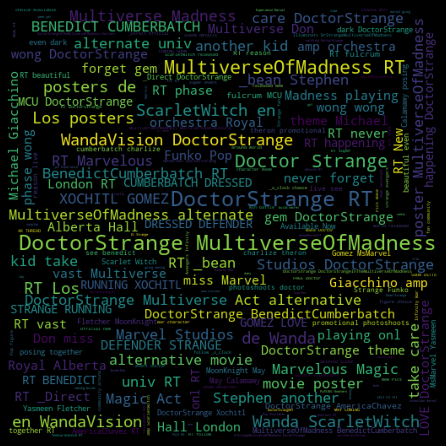

In [ ]:
create_wordcloud(df_new)

In [ ]:
df_new.columns

Index(['Date', 'Tweet', 'Name', 'Likes', 'Retweet', 'Location', 'len',
       'Sentiment'],
      dtype='object')

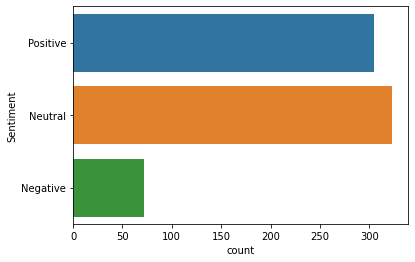

In [ ]:
for col in df_new.select_dtypes(include='object'):
    if df_new[col].nunique() <= 30:
        sns.countplot(y=col, data=df_new)
        plt.show()
